<a href="https://colab.research.google.com/github/dwm-multimidia/dwm-multimidia.github.io/blob/master/lab2/jupyter/Lab2_Anexo1_Cap_img_colab_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clonando o nosso repositório do github pra conseguir acessar os arquivos

---



In [1]:
from pathlib import Path
import shutil

dirGit = Path('/content/dwm-multimidia.github.io/')
if dirGit.exists():
  shutil.rmtree(dirGit)

!git clone https://github.com/dwm-multimidia/dwm-multimidia.github.io.git

dirLab2 = dirGit.joinpath('lab2/jupyter/')
print('\nAgora temos acesso aos arquivos:\n\t', '\n\t '.join([str(arquivo) for arquivo in dirLab2.iterdir()]))

Cloning into 'dwm-multimidia.github.io'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 117 (delta 40), reused 83 (delta 19), pack-reused 0
Receiving objects: 100% (117/117), 45.16 MiB | 33.49 MiB/s, done.
Resolving deltas: 100% (40/40), done.

Agora temos acesso aos arquivos:
	 /content/dwm-multimidia.github.io/lab2/jupyter/Lab2_Anexo1_Cap_img_colab_x.ipynb
	 /content/dwm-multimidia.github.io/lab2/jupyter/Lab2_Imagem_Video_v2.ipynb
	 /content/dwm-multimidia.github.io/lab2/jupyter/Pikachu.mp4
	 /content/dwm-multimidia.github.io/lab2/jupyter/Lab2_Anexo2_Cap_vid_colab_x.ipynb
	 /content/dwm-multimidia.github.io/lab2/jupyter/messi5.jpg


### Captura de Imagem da Camera usando uma webcam

Execute o código JavaScript abaixo para definir a função de captura e o botão de fotografar

In [2]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [3]:
def take_photo(filename, quality):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Captura de uma imagem da Webcam

Execute o código abaixo para capturar e mostrar uma foto.

Neste exemplo, será salvo no arquivo é "photo1.jpg"

Mude o nome do arquivo conforme sua necessidade.

<IPython.core.display.Javascript object>

Imagem gravada em /content/dwm-multimidia.github.io/lab2/jupyter/photo3.jpg


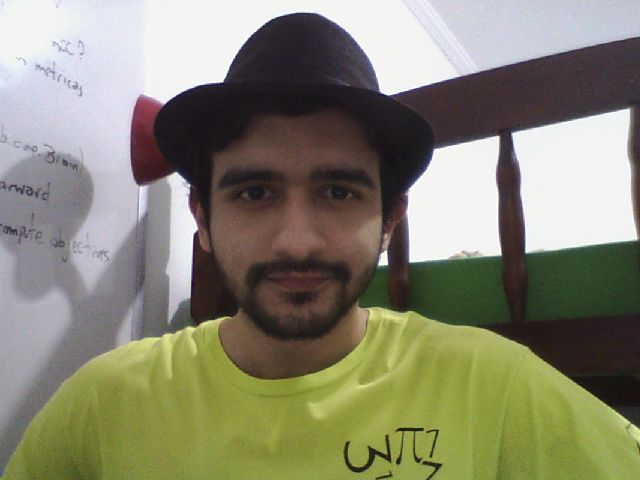

In [10]:
from IPython.display import Image
import os
image_path = dirLab2
filename=os.path.join(image_path,'photo3.jpg')
quality=0.8
try:
  take_photo(filename, quality)

  print('Imagem gravada em {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### Referência:

Adaptado de: **Colab Image Handling.** 
https://colab.research.google.com/github/jfogarty/machine-learning-intro-workshop/blob/master/colab/examples/Colab_Image_Handling.ipynb